<div class='alert alert-box alert-info'>
    <b> Importing Libraries<b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

***
<div class='alert alert-box alert-info'>
    <b> Importing and Reading Dataset<b>

In [2]:
df = pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
pd.DataFrame({'Column Names':df.columns.values},index=range(1,22))

,Column Names
1,customerID
2,gender
3,SeniorCitizen
4,Partner
5,Dependents
6,tenure
7,PhoneService
8,MultipleLines
9,InternetService
10,OnlineSecurity


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

__Observation: 🔎__
- No null values 
- Total of 21 columns
- columns to drop = 1 {CustomerID}

In [5]:
#printing the unique values of all the columns
for i in df: print ("No. of values=",df[i].nunique(),'\n',df[i].value_counts(),'\n','-'*100)

No. of values= 7043 
 7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 Male      3555
Female    3488
Name: gender, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 No     3641
Yes    3402
Name: Partner, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 
 -------------------------------------------------

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

__Observation:__ 🔎
- There are blank values in the total charges column

***
<div class='alert alert-box alert-info'>
    <b>Exploratory Data Analysis & Data Visualization<b>

In [8]:
categorical_feats, numerical_feats = [], []

for i in df: 
    if df[i].dtypes=='object': categorical_feats.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'): numerical_feats.append(i)

print('Total Number of Features →', df.shape[1])
print('Number of Categorical Features →', len(categorical_feats))
print('Number of Numerical Features →', len(numerical_feats))

Total Number of Features → 21
Number of Categorical Features → 18
Number of Numerical Features → 3


In [9]:
df.groupby(['gender'])['Churn'].size()

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

In [10]:
# checking the churn rate in percentage
df_churned = df["Churn"][df["Churn"] == 'Yes']
print ("Churn Percentage =", str(round((df_churned.shape[0] / df["Churn"].shape[0]) * 100,2))+'%' )

Churn Percentage = 26.54%


In [11]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

__Observation:__ 🔎
- Data in the `churn` column is imbalanced 
- Churn rate = _26.5%_ 

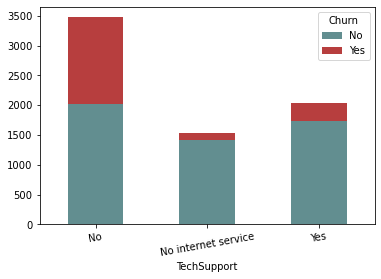

In [12]:
df.groupby(["TechSupport", "Churn"]).size().unstack().plot(kind='bar', stacked=True,color=(['#628E90','#B73E3E']))
plt.xticks(rotation=10)
plt.show()

__Observation:__ 🔎
- Most of the people that are leaving have not signed up for tech support

__Assumption:__
the majority of visitors might be departing since there isn't a customer care agent available to them to speak with.

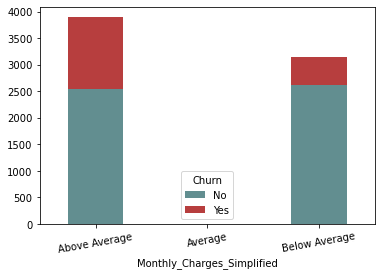

In [13]:
# determining whether excessive monthly fees are the cause of the individuals departing
df_new = df.copy()
Monthly_Charges_Simplified = []
for i in df_new['MonthlyCharges']:
    if i > 65: Monthly_Charges_Simplified.append('Above Average') 
    elif i == 65: Monthly_Charges_Simplified.append('Average')
    elif i < 65: Monthly_Charges_Simplified.append('Below Average')
df_new['Monthly_Charges_Simplified'] = Monthly_Charges_Simplified

# plot
df_new.groupby(['Monthly_Charges_Simplified','Churn']).size().unstack().plot(kind='bar',stacked=True,
                                                                             color=(['#628E90','#B73E3E']))
plt.xticks(rotation=10)
plt.show()

__Observation:__ 🔎
- Most of the people that are leaving are paying monthly charges that are above average (i.e; 65$).

__Assumption:__
the majority of visitors might be departing because they found a better alternative to their current telcom provider that takes
less charges

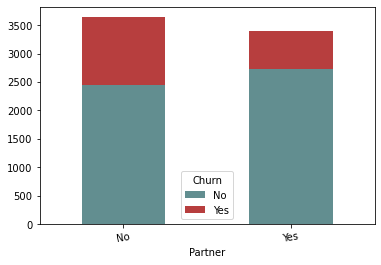

In [14]:
df.groupby(["Partner", "Churn"]).size().unstack().plot(kind='bar', stacked=True,color=(['#628E90','#B73E3E']))
plt.xticks(rotation=10)
plt.show()

__Observation: 🔎__
- Customers with no partners usually leave the telecom service more than the ones with partners

__Assumption:__
This is probably becasue customers with no partners have more freedom and can take the decision to switch services without much consequences. This could be because the customer could be travelling, not getting better coverage or prefers the prices of other telecoms over their current one.

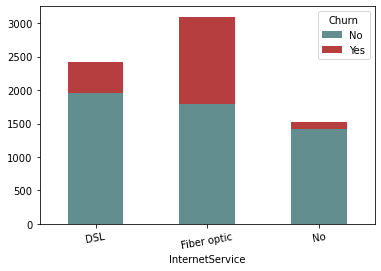

In [15]:
df.groupby(["InternetService", "Churn"]).size().unstack().plot(kind='bar', stacked=True,color=(['#628E90','#B73E3E']))
plt.xticks(rotation=10)
plt.show()

__Observation: 🔎__
- Customers with a Fiber Optic connection seem to have the highest churn rate. 

__Assumption:__
This is probably because the fiber optic connections installed by this telecom service is faulty

***
<div class='alert alert-box alert-info'>
    <b>Feature Engineering<b>

In [16]:
#Tenure groups, Monthly charges and Total charges will be divided into groups

#Tenure (the number of months the customer has stayed with the company)
Tenure = []
for t in df.tenure: 
    if t <= 12: Tenure.append('Bronze Customer')
    elif t <= 36: Tenure.append('Silver Customer')
    elif t <= 55: Tenure.append('Gold Customer')        
    elif t > 55: Tenure.append('Platinum Customer')      
        
#MontlyCharges 
Monthly = []
for m in df.MonthlyCharges: 
    if m <= 36: Monthly.append('Telecom Package 1')
    elif m <= 75: Monthly.append('Telecom Package 2')
    elif m <= 95: Monthly.append('Telecom Package 3')        
    elif m > 95: Monthly.append('Telecom Package 4')
        
#Total Charges {removing the blank values and replacing it with the 25 Quartile value}
TotalCharge = []
for values in df.TotalCharges:
    if values != ' ': TotalCharge.append(values)
    else: TotalCharge.append('1609')
df.TotalCharges = TotalCharge
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x))

TotalC = []
for c in df.TotalCharges: 
    if c <= 1700: TotalC.append('Annual Bronze') 
    elif c <= 3500: TotalC.append('Annual Silver')
    elif c <= 5000: TotalC.append('Annual Gold')        
    elif c > 5000: TotalC.append('Annual Platinum')

In [17]:
df.tenure = Tenure
df.MonthlyCharges = Monthly
df.TotalCharges = TotalC

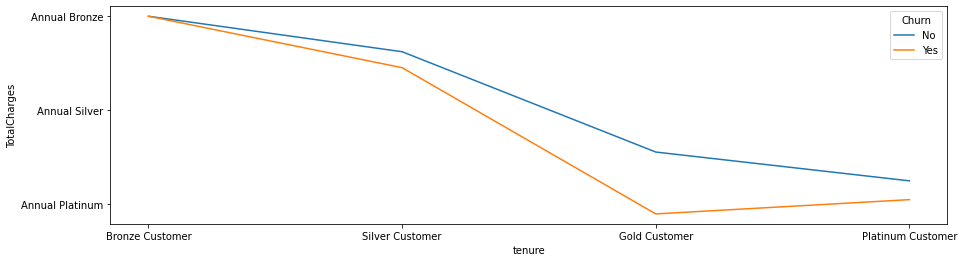

In [18]:
plt.figure(figsize=(15,4))
sns.lineplot(x='tenure',y='TotalCharges',hue='Churn',data=df, ci=None)
plt.show()

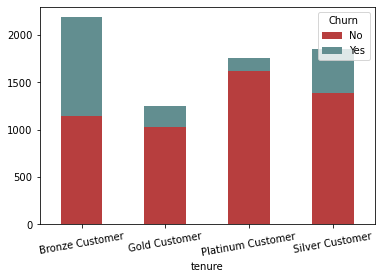

In [19]:
df.groupby(["tenure", "Churn"]).size().unstack().plot(kind='bar', stacked=True,color=(['#B73E3E','#628E90']))
plt.xticks(rotation=10)
plt.show()

__Observation: 🔎__
- We can see that platinum customers (__customers who used the telecom service for more than 55 months__) have the lowest churn rate.
    - <u>Ranking (_lowest to highest churn rate_):</u>
        - Platinum Customer
        - Gold Customer 
        - Silver Customer
        - Bronze Customer

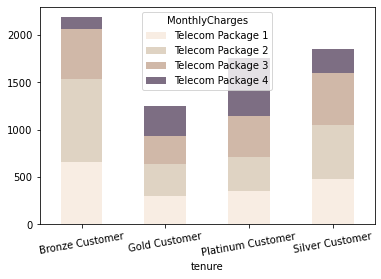

In [20]:
df.groupby(["tenure", "MonthlyCharges"]).size().unstack().plot(kind='bar', stacked=True, color=(['#F8EDE3','#DFD3C3',
                                                                                                 '#D0B8A8','#7D6E83']))
plt.xticks(rotation=10)
plt.show()

__Observation:__ 🔎
- `Bronze` and `Silver` tenured (__0-36 months__) customers usually pay between __0-1500 USD__

__Assumption:__
Having a better pricing for these tiers of customers could help with customer retention and should therefore try to implement better pricing for an average customer.

<div class='alert alert-box alert-info'>
    <b>Label Encoding the Categorical columns<b>

In [21]:
from sklearn.preprocessing import LabelEncoder

for i in df: 
    if df[i].dtypes == 'O': df[i] = LabelEncoder().fit_transform(df[i])

<div class='alert alert-box alert-info'>
    <b>Outliers, Skewness, VIF and Correlation<b>

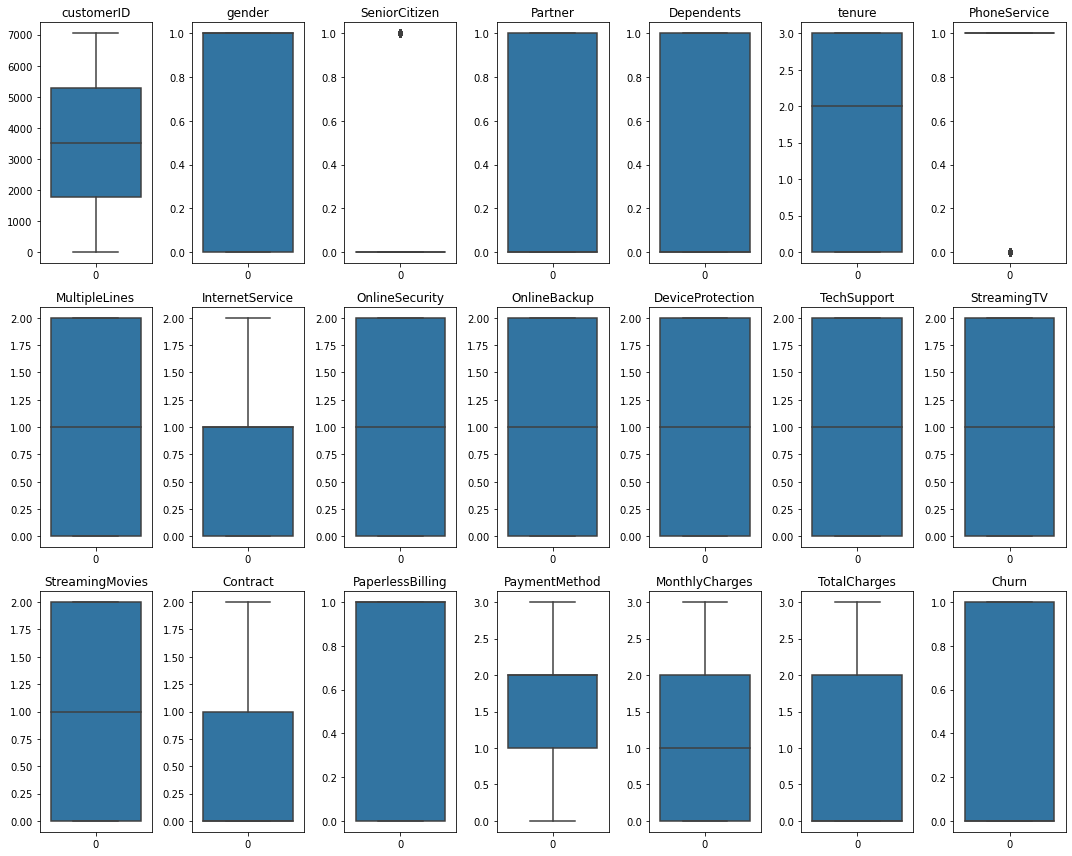

In [22]:
# outliers
collist = df.columns.values
nrows = 3
ncols = 7

plt.figure(figsize=(15,12))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(data=df[collist[i]],orient='v')
    plt.title(collist[i])
    plt.tight_layout()

__Observation: 🔎__
- The only two columns with outliers are `SeniorCitizen` and `PhoneService`

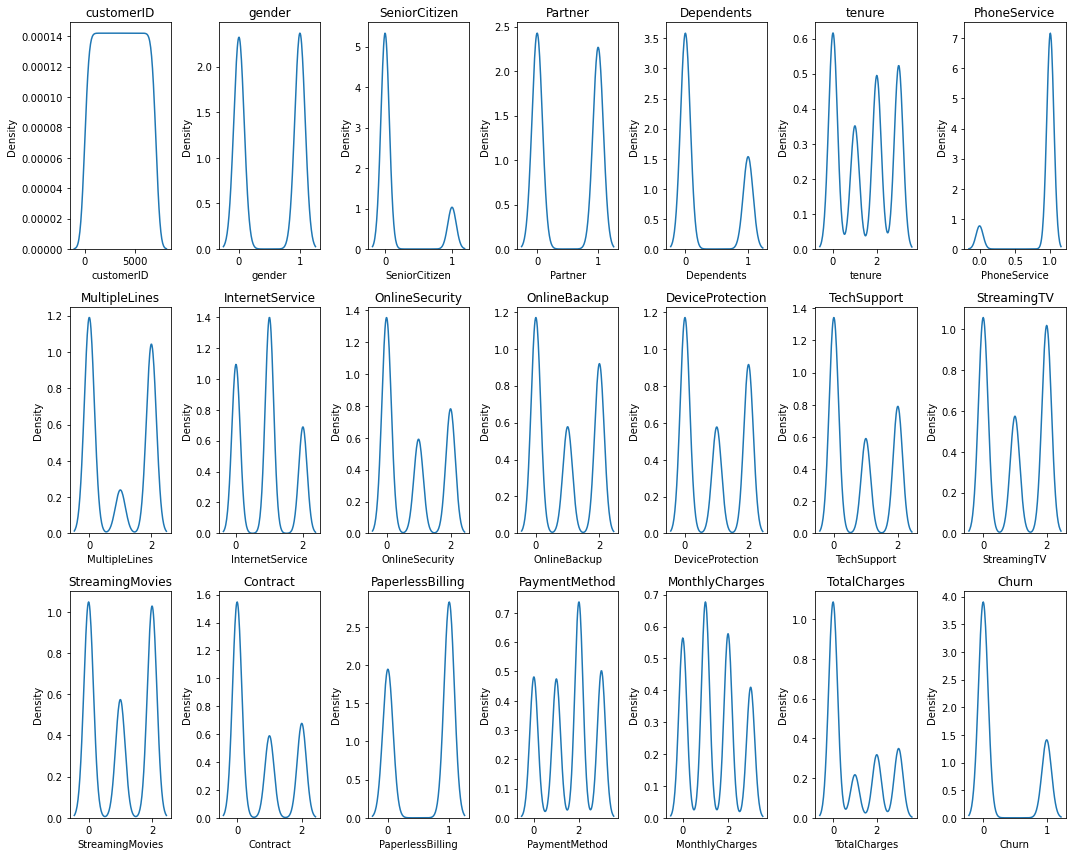

In [23]:
# skewness
collist = df.columns.values
nrows = 3
ncols = 7

plt.figure(figsize=(15,12))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.kdeplot(data=df[collist[i]])
    plt.title(collist[i])
    plt.tight_layout()

In [24]:
# checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['Columns'] = df.columns
VIF['VIF_Factor'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
VIF[VIF.VIF_Factor>10]

,Columns,VIF_Factor
6,PhoneService,11.17543


__Observation: 🔎__
- `PhoneService` and `MonthlyCharges` have high VIF

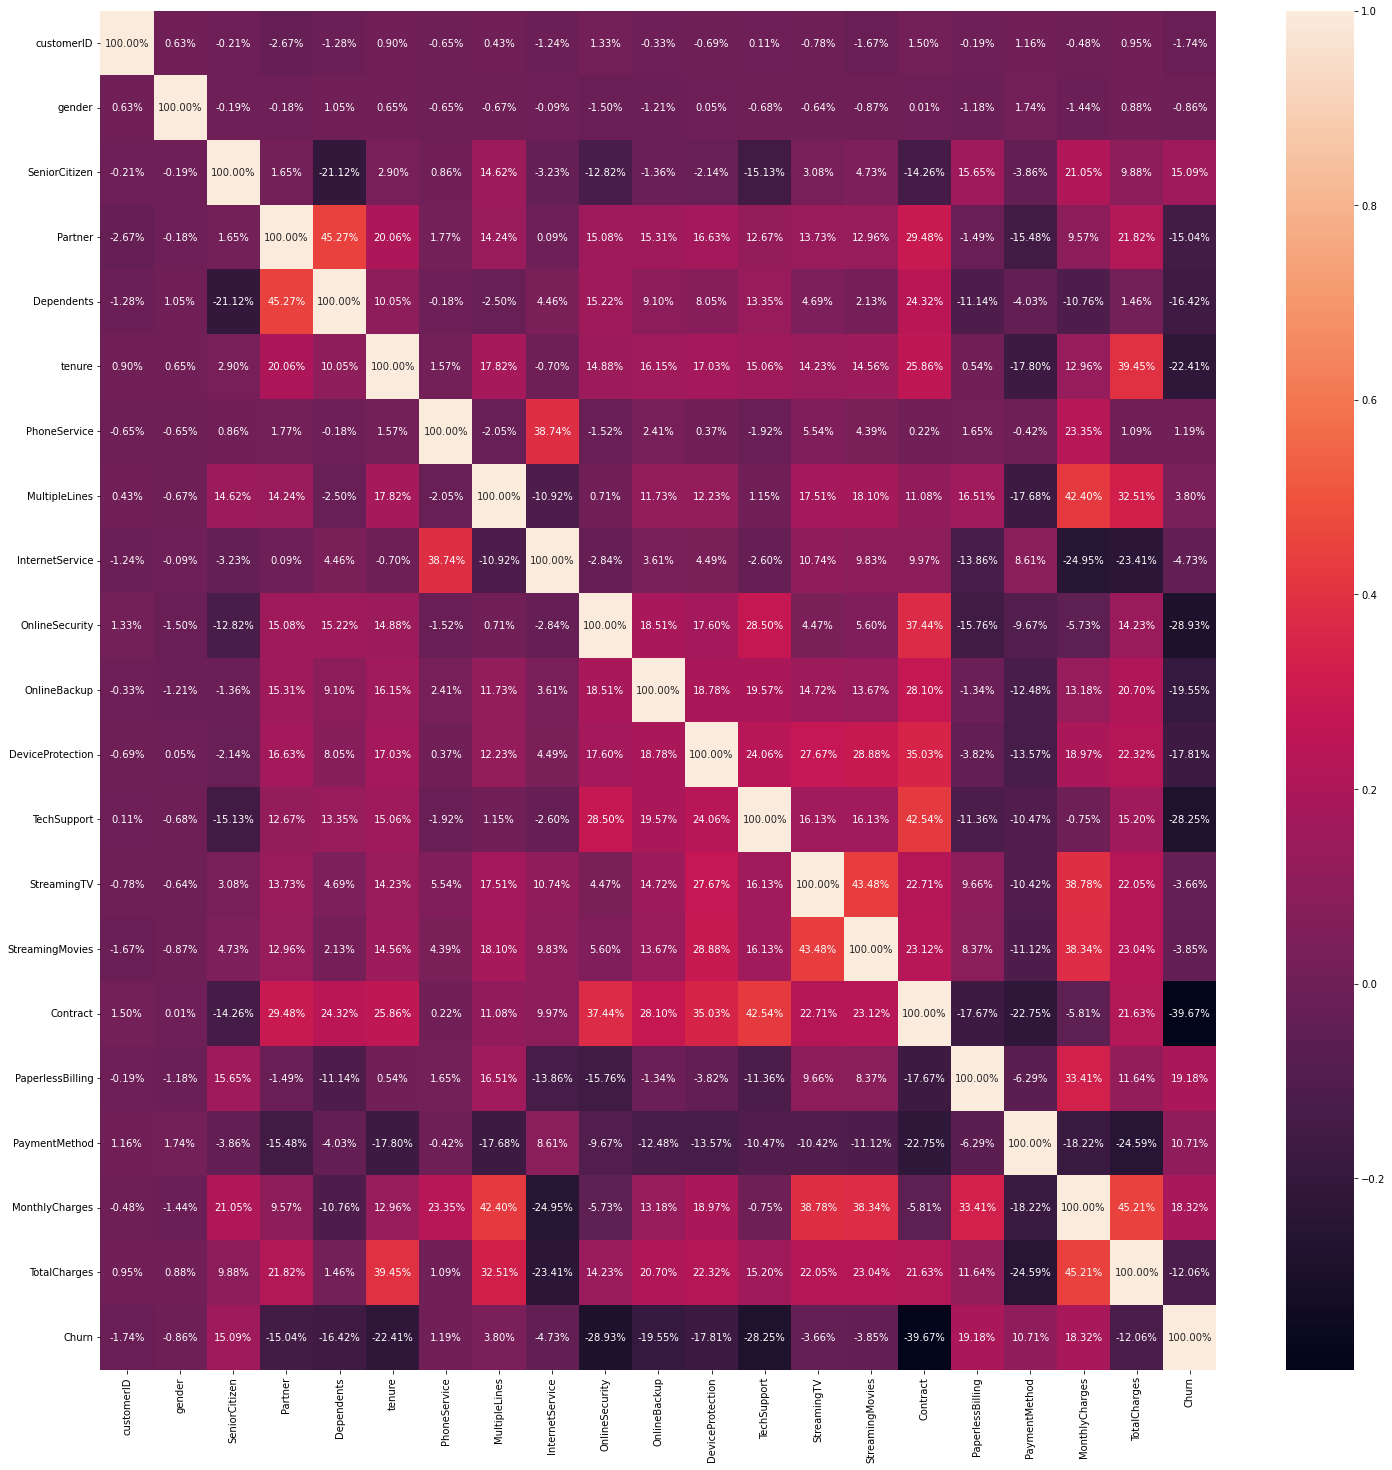

In [25]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.show()

__Observation:__ 🔎
- `Tenure`  has a high correlation with `Contract` → __67.16%__
- `MonthlyCharges` has a high correlation with `MultipleLines` → __43.36%__
- `Contract` has a high correlation with `TechSupport` → __42.54%__
- `StreamingMovies` has a high correlation with `StreamingTV` → __43.48%__
- `Dependents` has a high correlation with `Partner` → __45.27%__

***
> <div class='alert alert-box alert-success'>
    <b>Removing Outliers<b>

In [26]:
# using zscore for outlier removal
from scipy.stats import zscore

z = np.abs(zscore(df))
df_z = df[(z<3).all(axis=1)] 
print ("Percentage of data loss =",(df.shape[0]-df_z.shape[0])/df.shape[0]*100,'%')

Percentage of data loss = 9.683373562402386 %


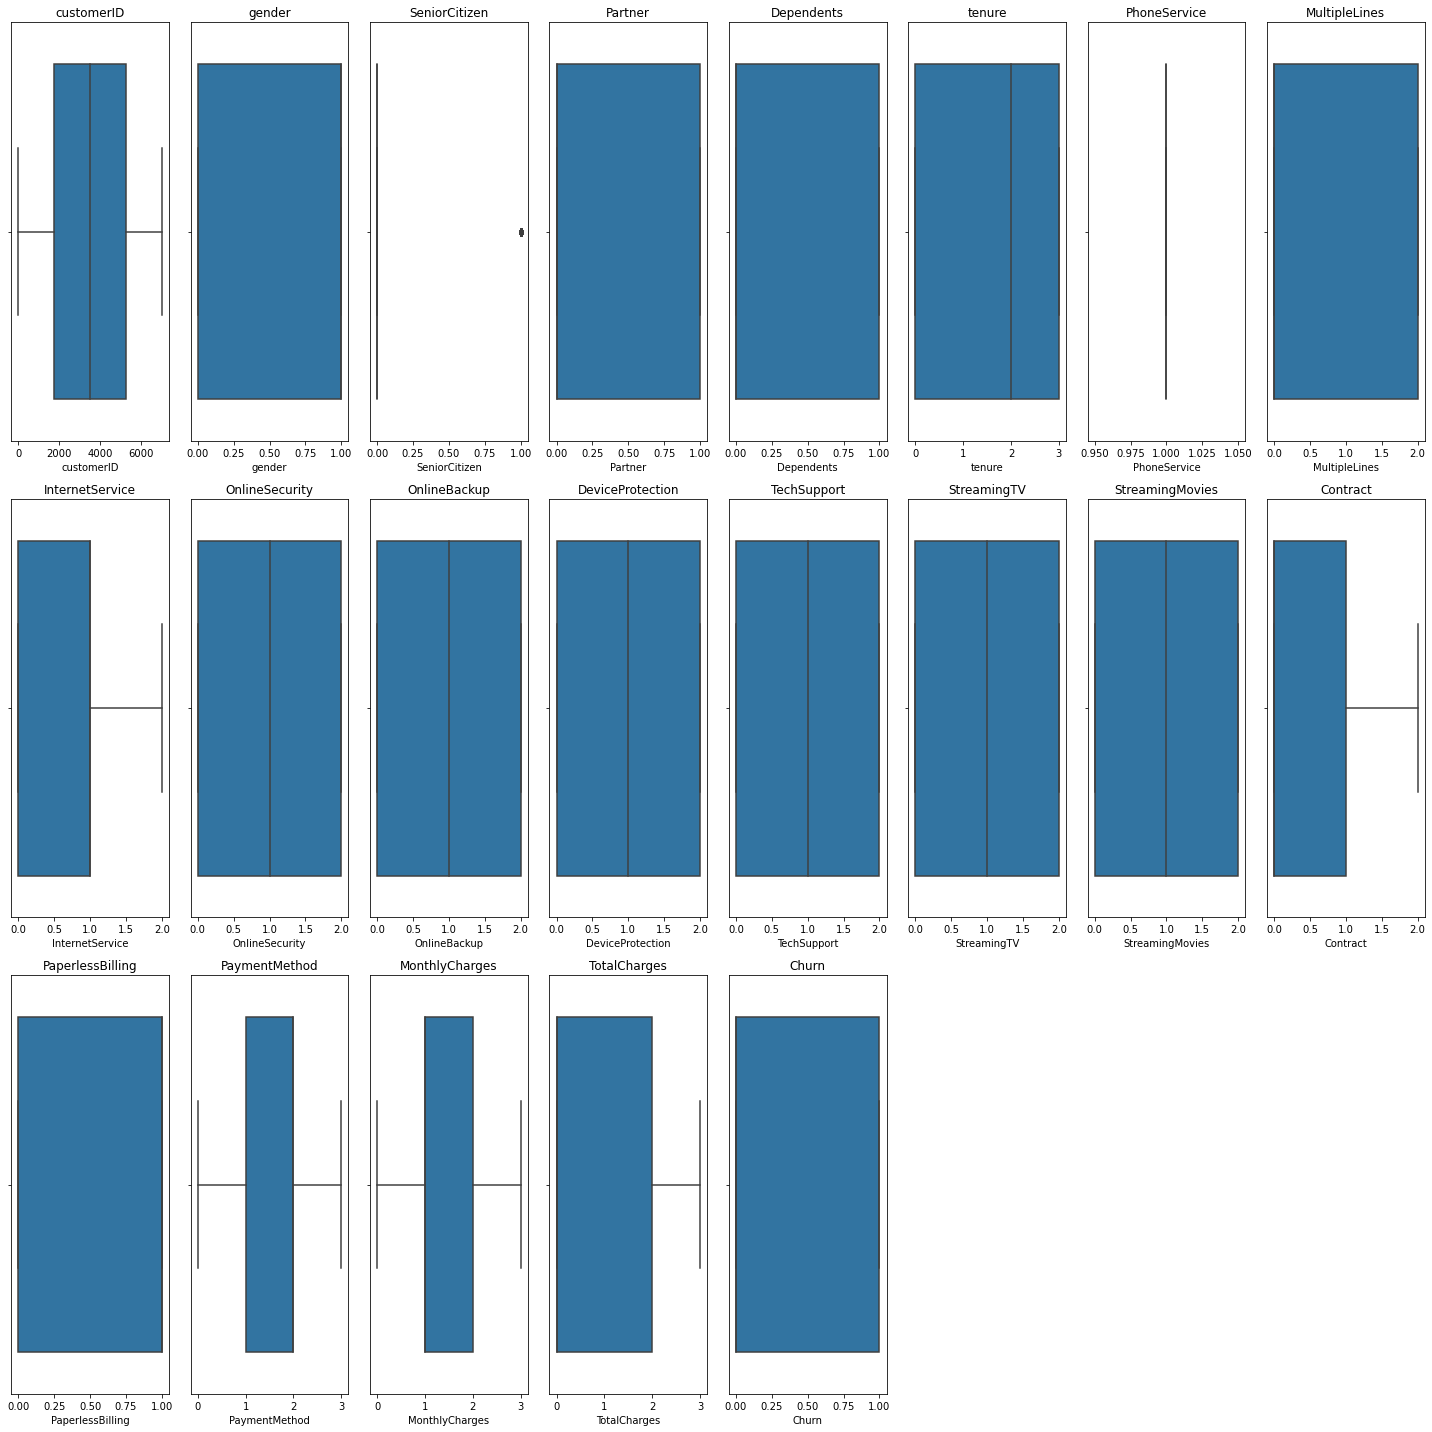

In [27]:
# outliers after zscore
collist = df_z.columns.values
nrows = 3
ncols = 8

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(x=df_z[collist[i]])
    plt.title(df.columns[i])
    plt.tight_layout()

__Observation:__ 🔎
- Using Zscore removes about 10% of the data.
- Leaving outliers only in the senior citizen column.

In [28]:
# checking multicollinearity 
VIF = pd.DataFrame()
VIF['Columns'] = df_z.columns
VIF['VIF_Factor'] = [variance_inflation_factor(df_z.values,i) for i in range(df_z.shape[1])]
VIF[VIF.VIF_Factor>10]

,Columns,VIF_Factor
6,PhoneService,20.751641


In [29]:
df_z = df_z.drop('PhoneService',axis=1) #dropping phone service because of high VIF Factor

In [30]:
# using IQR method for outlier removal

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print ("Percentage of data loss =",(df.shape[0]-df_IQR.shape[0])/df.shape[0]*100,'%')

Percentage of data loss = 24.42141133039898 %


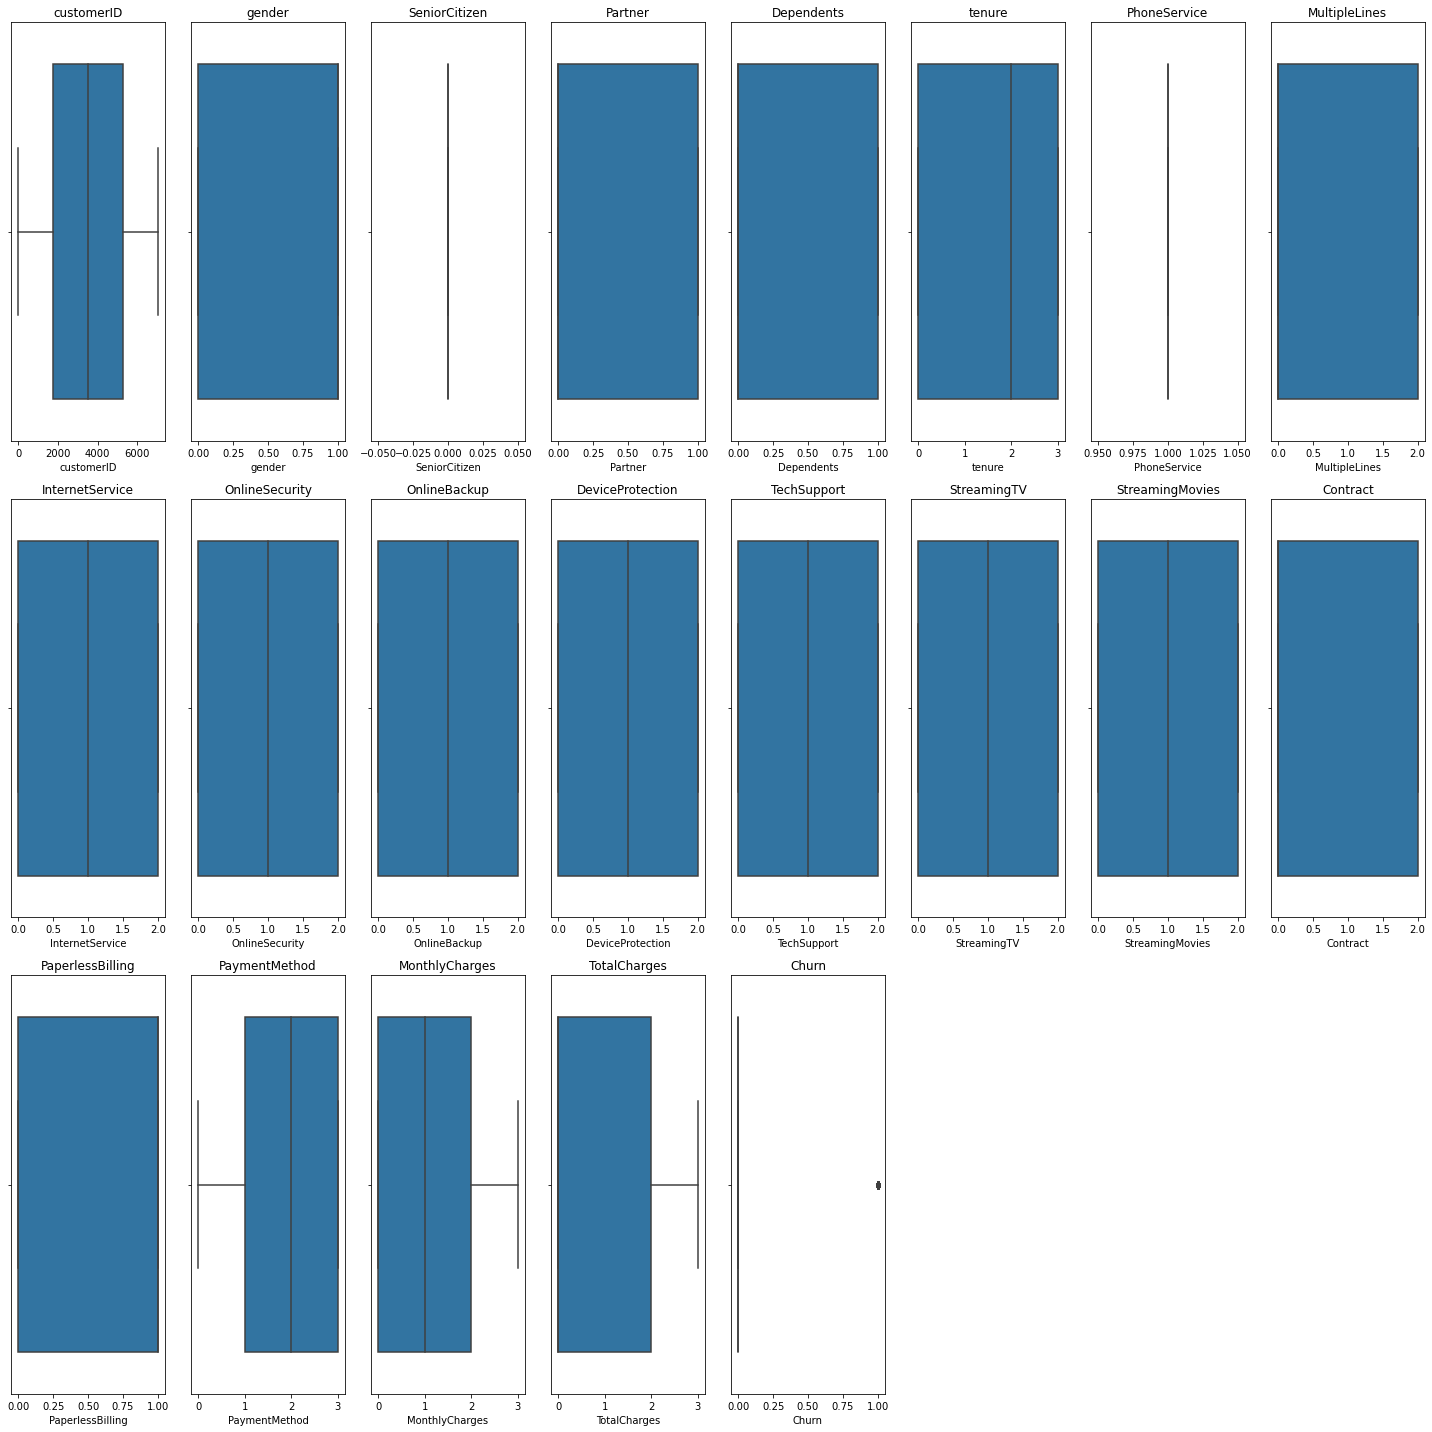

In [31]:
# outliers after using IQR to remove outliers
collist = df_IQR.columns.values
nrows = 3
ncols = 8

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(df_IQR[collist[i]], orient='v')
    plt.title(df.columns[i])
    plt.tight_layout()

In [32]:
# checking multicollinearity 
VIF = pd.DataFrame()
VIF['Columns'] = df_IQR.columns
VIF['VIF_Factor'] = [variance_inflation_factor(df_IQR.values,i) for i in range(df_IQR.shape[1])]
VIF[VIF.VIF_Factor>10]

,Columns,VIF_Factor
6,PhoneService,20.454668


In [33]:
df_IQR = df_IQR.drop('PhoneService',axis=1) #dropping phone service because of high VIF Factor

__Observation:__ 🔎
- using Zscore method to remove outliers led to a better predictive model with better accuracy when compared with the base model (i:e; without removing outliers).
- Using IQR led to the model having the best possible accuracy compared to both zscore and base.

<div class='alert alert-box alert-info'>
    <b>Splitting into X & Y<b>

In [34]:
df_IQR = pd.get_dummies(df_IQR)

In [35]:
x = df_IQR.drop(df_IQR[['customerID','Churn']],axis=1)
y = df_IQR['Churn']

***
<div class='alert alert-box alert-info'>
    <b>Standardizing<b>

In [36]:
# standardizing and transforming the data
from sklearn.preprocessing import StandardScaler, power_transform

x = StandardScaler().fit_transform(x)
# x = power_transform(x,method='yeo-johnson')

***
<div class='alert alert-box alert-info'>
    <b>Model Building<b>

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=8)

In [38]:
# making a function for roc_auc score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test,y_pred):
    y_test_new = LabelBinarizer().fit_transform(y_test)
    y_pred_new = LabelBinarizer().fit_transform(y_pred)
    return round(roc_auc_score(y_test_new,y_pred_new)*100,2)

In [39]:
# making a function for classification models
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

Model, score, f1, cross, roc_auc = [], [], [], [], []

def classification_model(model):
    Model.append(str(model).split("(")[0])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    scoree = round(accuracy_score(y_test,y_pred)*100,2)
    score.append(scoree)
    
    f1_s = round(f1_score(y_test,y_pred,average='micro')*100,2)
    f1.append(f1_s)
    
    cross_v = cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    cross.append(cross_v)
    
    roc_ = multiclass_roc_auc_score(y_test,y_pred)
    roc_auc.append(roc_)
    
    print ("Model:",str(model).split("(")[0])
    print ("Accuracy Score:",scoree)
    print ("f1 Score:",f1_s)
    print ("CV Score:",cross_v)
    print ("ROC_AUC Score:",roc_)

#      shows the classification report
    class_report = classification_report(y_test,model.predict(x_test))
    print (class_report)
    
    
#     shows the confusion matrix
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,square=True)

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_para = {'penalty':['l1','l2','elasticnet','none'],'C':[1,10]}
gs_lr = GridSearchCV(lr,lr_para,cv=3,scoring='accuracy')
gs_lr.fit(x_train,y_train)
gs_lr.best_params_

{'C': 1, 'penalty': 'none'}

Model: LogisticRegression
Accuracy Score: 81.78
f1 Score: 81.78
CV Score: 0.8061211894652203
ROC_AUC Score: 69.17
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       817
           1       0.66      0.46      0.54       248

    accuracy                           0.82      1065
   macro avg       0.75      0.69      0.71      1065
weighted avg       0.80      0.82      0.81      1065



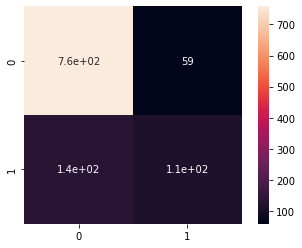

In [41]:
lr = LogisticRegression(penalty='none',C=1)
classification_model(lr) 

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
gsCV_dtc = GridSearchCV(dtc,dtc_para,cv=3,scoring='accuracy')
gsCV_dtc.fit(x_train,y_train)
gsCV_dtc.best_params_

{'criterion': 'log_loss', 'splitter': 'random'}

Model: DecisionTreeClassifier
Accuracy Score: 73.05
f1 Score: 73.05
CV Score: 0.7467579596270224
ROC_AUC Score: 63.2
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       817
           1       0.43      0.45      0.44       248

    accuracy                           0.73      1065
   macro avg       0.63      0.63      0.63      1065
weighted avg       0.74      0.73      0.73      1065



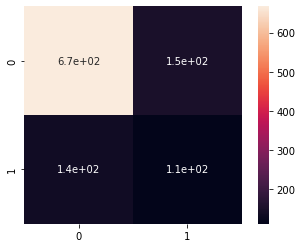

In [43]:
dtc = DecisionTreeClassifier(criterion='log_loss',splitter='random')
classification_model(dtc)

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_para = {'n_estimators':range(50,250,50),'criterion':['gini','entropy']}
gsCV_rfc = GridSearchCV(rfc,rfc_para,cv=3,scoring='accuracy')
gsCV_rfc.fit(x_train,y_train)
gsCV_rfc.best_params_

{'criterion': 'gini', 'n_estimators': 150}

Model: RandomForestClassifier
Accuracy Score: 76.43
f1 Score: 76.43
CV Score: 0.7878958653669822
ROC_AUC Score: 63.58
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       817
           1       0.49      0.40      0.44       248

    accuracy                           0.76      1065
   macro avg       0.66      0.64      0.64      1065
weighted avg       0.75      0.76      0.75      1065



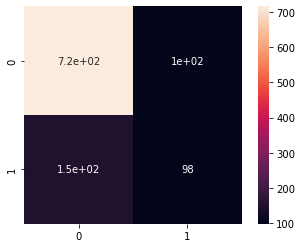

In [45]:
rfc = RandomForestClassifier(n_estimators=150,criterion='gini')
classification_model(rfc)

In [46]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_para = {'n_estimators':range(50,300,50),'algorithm':['SAMME','SAMME.R']}
gs_abc = GridSearchCV(abc,abc_para,cv=5,scoring='accuracy')
gs_abc.fit(x_train,y_train)
gs_abc.best_params_

{'algorithm': 'SAMME', 'n_estimators': 250}

Model: AdaBoostClassifier
Accuracy Score: 82.25
f1 Score: 82.25
CV Score: 0.8143890448447573
ROC_AUC Score: 70.88
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       817
           1       0.66      0.50      0.57       248

    accuracy                           0.82      1065
   macro avg       0.76      0.71      0.73      1065
weighted avg       0.81      0.82      0.81      1065



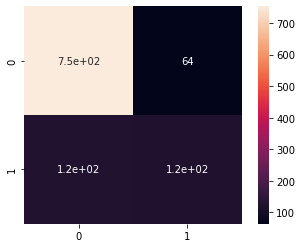

In [47]:
ada = AdaBoostClassifier(n_estimators=250,algorithm='SAMME')
classification_model(ada) 

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc_para = {'n_estimators':range(50,300,50),'loss':['log_loss','deviance','exponential'],
            'criterion':['friedman_mse','squared_error','mse']}
gs_gbc = GridSearchCV(gbc,gbc_para,cv=5,scoring='accuracy')
gs_gbc.fit(x_train,y_train)
gs_gbc.best_params_

{'criterion': 'friedman_mse', 'loss': 'log_loss', 'n_estimators': 100}

Model: GradientBoostingClassifier
Accuracy Score: 81.69
f1 Score: 81.69
CV Score: 0.8142021329120175
ROC_AUC Score: 70.65
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       817
           1       0.64      0.50      0.56       248

    accuracy                           0.82      1065
   macro avg       0.75      0.71      0.72      1065
weighted avg       0.81      0.82      0.81      1065



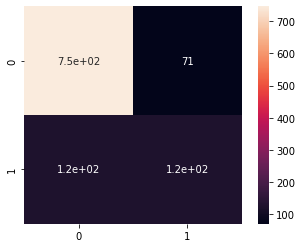

In [49]:
gbc = GradientBoostingClassifier(n_estimators=100,criterion='friedman_mse',loss='log_loss')
classification_model(gbc)

In [50]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc_para = {'n_estimators':range(50,250,50)}
gsCV_bc = GridSearchCV(bc,bc_para,cv=5,scoring='accuracy')
gsCV_bc.fit(x_train,y_train)
gsCV_bc.best_params_

{'n_estimators': 200}

Model: BaggingClassifier
Accuracy Score: 75.4
f1 Score: 75.4
CV Score: 0.7792570074341577
ROC_AUC Score: 63.04
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       817
           1       0.47      0.40      0.43       248

    accuracy                           0.75      1065
   macro avg       0.65      0.63      0.64      1065
weighted avg       0.74      0.75      0.75      1065



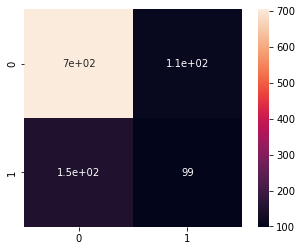

In [51]:
bc = BaggingClassifier(n_estimators=200)
classification_model(bc) 

In [52]:
from sklearn.svm import SVC
svc = SVC()
svc_para={'C':range(1,10),'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gsCV_svc = GridSearchCV(svc,svc_para,cv=3,scoring='accuracy')
gsCV_svc.fit(x_train,y_train)
gsCV_svc.best_params_

{'C': 1, 'kernel': 'rbf'}

Model: SVC
Accuracy Score: 80.94
f1 Score: 80.94
CV Score: 0.810633525652781
ROC_AUC Score: 67.36
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       817
           1       0.64      0.42      0.51       248

    accuracy                           0.81      1065
   macro avg       0.74      0.67      0.69      1065
weighted avg       0.79      0.81      0.79      1065



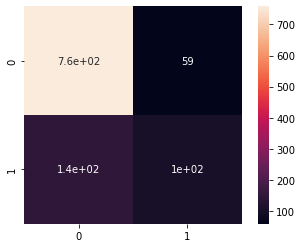

In [53]:
svc = SVC(kernel='rbf',C=1)
classification_model(svc)

In [54]:
classifier_models = pd.DataFrame({'Model Name':Model,'Accuracy Score':score,'F1 Score':f1,'CV Score':cross,
                                  'ROC_AUC Score':roc_auc})
classifier_models.sort_values(by='F1 Score',ascending=False)

,Model Name,Accuracy Score,F1 Score,CV Score,ROC_AUC Score
3,AdaBoostClassifier,82.25,82.25,0.814389,70.88
0,LogisticRegression,81.78,81.78,0.806121,69.17
4,GradientBoostingClassifier,81.69,81.69,0.814202,70.65
6,SVC,80.94,80.94,0.810634,67.36
2,RandomForestClassifier,76.43,76.43,0.787896,63.58
5,BaggingClassifier,75.40,75.40,0.779257,63.04
1,DecisionTreeClassifier,73.05,73.05,0.746758,63.20


__Conclusion:__ ⛳
- AdaBoostClassifier is the best model for this project according to the metrics and the ROC_AUC score.

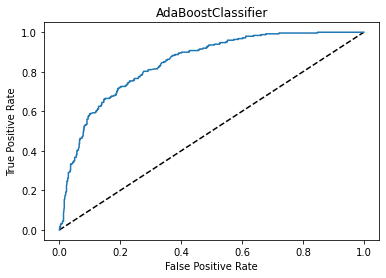

In [55]:
# Plotting ROC Curve for the model
from sklearn.metrics import roc_curve
y_pred_prob = ada.predict_proba(x_test)[:,1]  #1 is the probabilty of threshold value
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Ada Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier')
plt.show()

<AxesSubplot:>

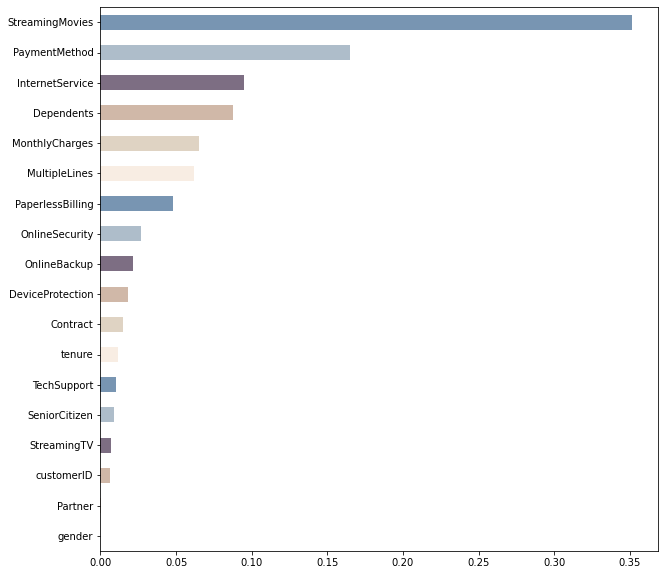

In [56]:
# Feature importance of the classifier
pd.Series(ada.feature_importances_, index = df_IQR.columns[:-2]).sort_values(ascending=True).plot(kind='barh', figsize=(10,10),
                                                                                               color=(['#F8EDE3','#DFD3C3',
                                                                                                     '#D0B8A8','#7D6E83',
                                                                                                      '#AEBDCA','#7895B2']))

***
<div class='alert alert-box alert-info'>
    <b>Saving the file<b>

In [57]:
import joblib
joblib.dump(ada,'ADA_Telecom_customer_churn.pkl')

['ADA_Telecom_customer_churn.pkl']